In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
wind=[]
for i in range(7):
    a=[0]*10
    a[3]=a[4]=a[5]=a[8]=1
    a[6]=a[7]=2
    wind.append(a);
    
    

startx=3
starty=0
endx=3
endy=7
d=[[0,1],[0,-1],[1,0],[-1,0]]

In [11]:
alpha=0.5
eps=0.1
gamma=1
episodes=150

In [12]:
Q=[]
R=[]
for i in range(7):
    a=[]
    a1=[]
    for j in range(10):
        b=[0]*4
        b1=[-1]*4
        a.append(b)
        a1.append(b1)
    Q.append(a)
    R.append(a1)
    
R[3][7]=[0,0,0,0]

In [13]:
def getaction(S):
    p=random.random()
    if(p<eps):
        a=random.randint(0,3)
        return a
    else:
        a=[]
        mx=-1e9
        for i in range(4):
            if mx<Q[S[0]][S[1]][i]:
                mx=Q[S[0]][S[1]][i]
                
        for i in range(4):
            if mx==Q[S[0]][S[1]][i]:
                a.append(i)
        return random.choice(a)

In [14]:
cnt=0
steps=[]
steps_per_episode=[]
for i in range(episodes):
    S=[startx,starty]
    A=getaction(S)
    cnt1=0
    while True:
        cnt+=1
        cnt1+=1
        newx=S[0]+d[A][0]+wind[S[0]][S[1]]
        newy=S[1]+d[A][1] # S'
        if newx>6:
            newx=6
        if newx<0:
            newx=0
        if newy>9:
            newy=9
        if newy<0:
            newy=0
        R=-1
        A1=getaction([newx,newy]) #A'
        Q[S[0]][S[1]][A]+=alpha*(R+gamma*Q[newx][newy][A1]-Q[S[0]][S[1]][A])
        #print("A={}, A1={},sx={}, sy={}, newx={}, newy={}, Q[sx][sy]={}, Q[newx][newy]={}".format(A,A1,S[0],S[1],newx,newy,Q[sx][sy],Q[newx][newy]))
        S=[newx,newy]
        A=A1
        if S==[endx,endy]:
            break
    steps.append(cnt)
    steps_per_episode.append(cnt1)

Text(0.5, 1.0, 'results')

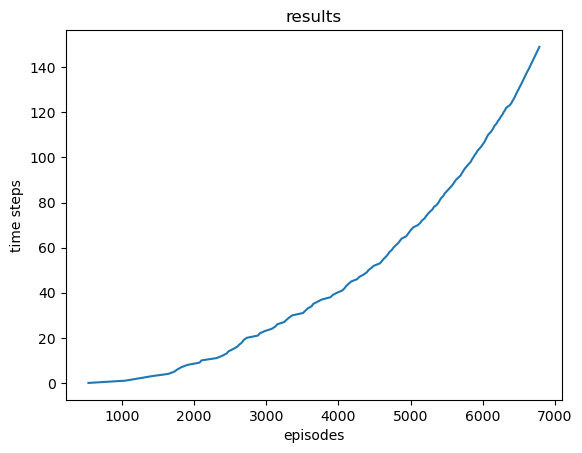

In [17]:
x=[]
for i in range(episodes):
    x.append(i)
plt.plot(steps,x)
plt.ylabel("time steps")
plt.xlabel("episodes")
plt.title("results")

Text(0.5, 1.0, 'results')

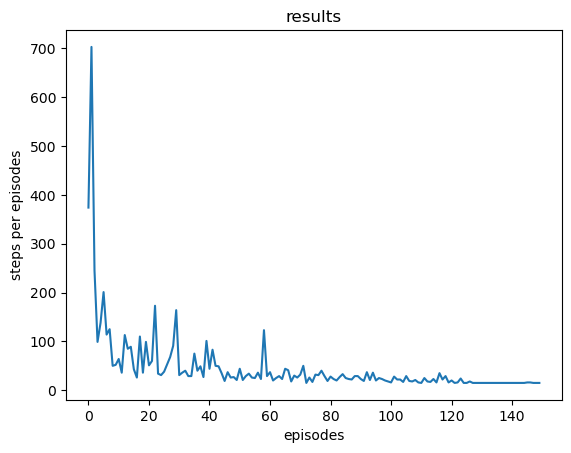

In [18]:
plt.plot(x,steps_per_iter)
plt.xlabel("episodes")
plt.ylabel("steps per episodes")
plt.title("results")